In [56]:
from pandas import Series, DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#Reading the file
df=pd.read_csv('capmetro_UT.csv')

In [58]:
#Let's look through the data
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [59]:
#Extarcting Date from timestamp
df['Date']=df['timestamp'].str.split(" ").str[0]

In [60]:
#Defining Total Ridership
df['Total_Ridership']=df['boarding']+df['alighting']
df.head()

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend,Date,Total_Ridership
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend,2018-09-01,1
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend,2018-09-01,3
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend,2018-09-01,7
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend,2018-09-01,7
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend,2018-09-01,6


# Visualizations

Text(0.5, 1.0, 'Average Ridership on Weekdays vs. Weekends per Month')

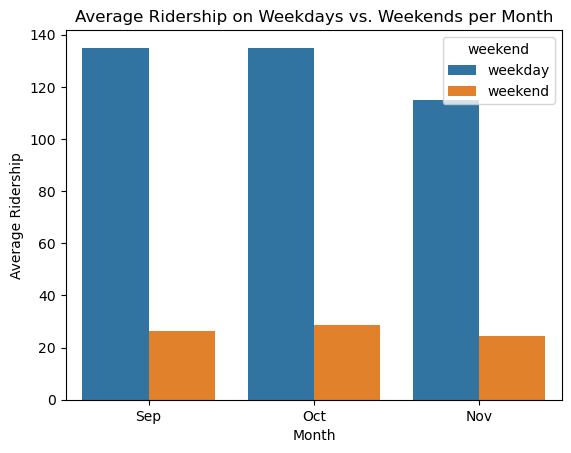

In [61]:
ridership_monthly = df.groupby(['month', 'weekend'])['Total_Ridership'].mean().reset_index()
# Create a bar plot
custom_palette = ["#1f77b4", "#ff7f0e"] 
ax = sns.barplot(x='month', y='Total_Ridership', hue='weekend',palette=custom_palette, data=ridership_monthly,order=['Sep','Oct','Nov'])
# Set labels and title
plt.xlabel('Month')
plt.ylabel('Average Ridership')
plt.title('Average Ridership on Weekdays vs. Weekends per Month')

###### Observations:
1. Weekday ridership exceeds weekend may be due to school classes.
2. The dip in ridership in November might be due to Thanksgiving holiday break!


###### Let's verify if the dip in ridership in november is actually due to Thanksgiving break.

<Axes: title={'center': 'Average Ridership in November by Day'}, xlabel='Date'>

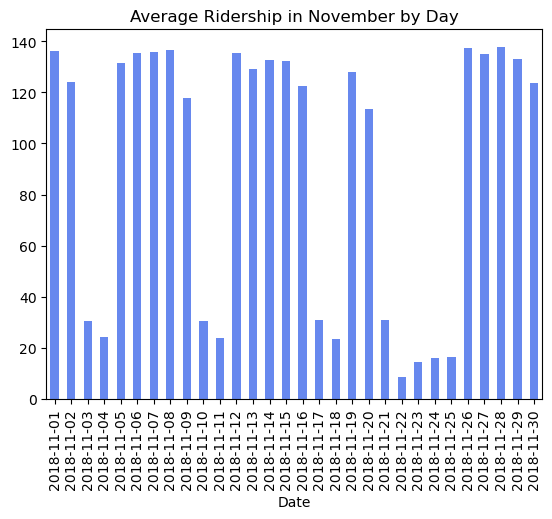

In [62]:
#Plotting average ridership in November by Date
df_nov=df[df['month']=='Nov']
df_nov_by_date=df_nov.groupby('Date')['Total_Ridership'].mean().to_frame()
df_nov_by_date.plot(kind='bar',title='Average Ridership in November by Day',legend=False)

###### Observations:
1. Dates: Nov 3, Nov 4, Nov 10, Nov 11, Nov 17, Nov 18 are weekends and hence there is low ridership.
2. The ridership then decreases suddenly between Nov 21- Nov 25 (Thanksgiving in 2018 was on Nov 22) and then increases again starting Nov 26.

###### The dip in ridership in November was indeed because of Thanksgiving break.

Text(0.5, 1.0, 'Average Ridership by Hour')

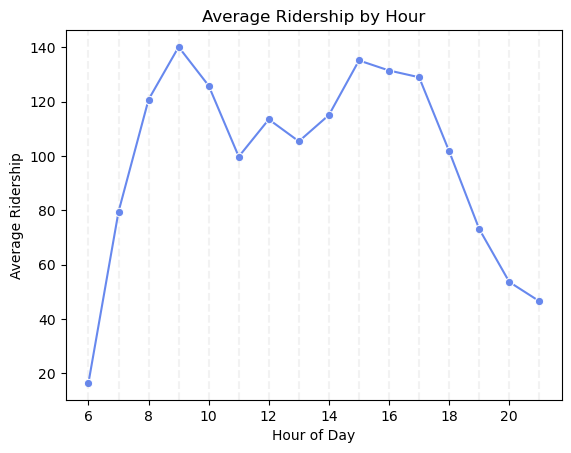

In [63]:
ridership_hourly=df.groupby(['hour_of_day'])['Total_Ridership'].mean().reset_index()
#df1=ridership_hourly.to_frame()
sns.lineplot(x='hour_of_day',y='Total_Ridership',data=ridership_hourly,marker='o')
for index, row in ridership_hourly.iterrows():
    plt.axvline(x=row['hour_of_day'], color='gray', linestyle='--', alpha=0.1)
# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Average Ridership')
plt.title('Average Ridership by Hour')

###### Observation:
Ridership peaks at 9AM, correlating with classes start, and again at 3PM-4PM when classes end.

Text(0.5, 1.0, 'Combined Ridership by Hour and Day of the Week')

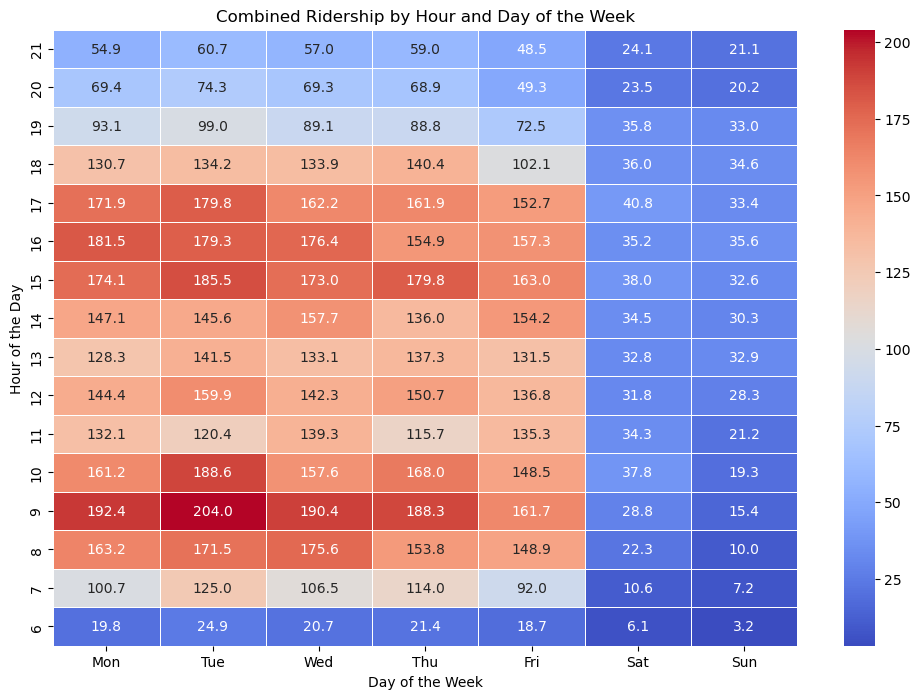

In [64]:
hourly_day_ridership = df.pivot_table(values='Total_Ridership', index='hour_of_day', columns='day_of_week', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.set_palette("coolwarm")
order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax = sns.heatmap(hourly_day_ridership[order].sort_index(ascending=False), annot=True, fmt=".1f", linewidths=0.5, cmap='coolwarm')

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.title('Combined Ridership by Hour and Day of the Week')

###### Observations:
1. Ridership on weekends is typically much lower than weekdays.
2. On weekends, the ridership increase during evening (4PM-7PM)
3. Tuesday mornings are rush hours!

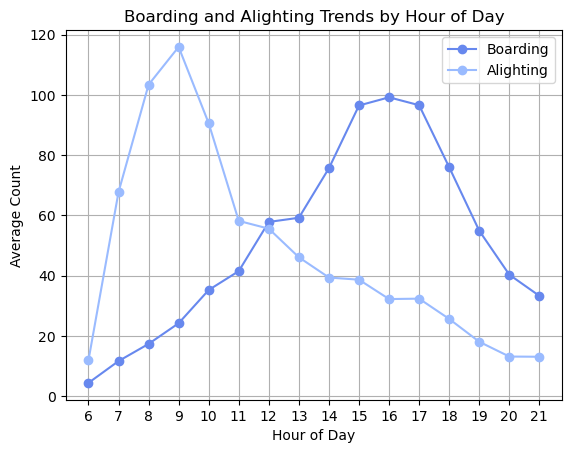

In [65]:
# Calculate average boarding and alighting for each hour of the day
hourly_data = df.groupby('hour_of_day')[['boarding', 'alighting']].mean()
plt.plot(hourly_data.index, hourly_data['boarding'], label='Boarding', marker='o')
plt.plot(hourly_data.index, hourly_data['alighting'], label='Alighting', marker='o')
plt.xlabel("Hour of Day")
plt.ylabel("Average Count")
plt.title("Boarding and Alighting Trends by Hour of Day")
plt.xticks(hourly_data.index)
plt.legend()
plt.grid(True)

###### Observations:
1. Peak in Alighting:
Since this dataset is about ridership around UT Campus, it makes sense to see a peak in alighting around 9am.This is primarily because many students and faculty members would disembark public transportation at this time, likely for their morning classes which often start around that hour

2. Peak in Borading: There is peak in boarding around 3PM-5PM because the classes end around those hours and people use the public transport at this time to go back.

3. Around 12PM, we see almost an equal number of people boarding and alighting!